In [5]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1. Blocking the prompt**: let the GUI main loop block the python process when you want interactive windows

**2. Input hook integration**: let the CLI main loop block the python process and intermittently run the GUI loop

**3. Full embedding**: fully embed python in the GUI (but this is basically writing a full application)



### Blocking Functions

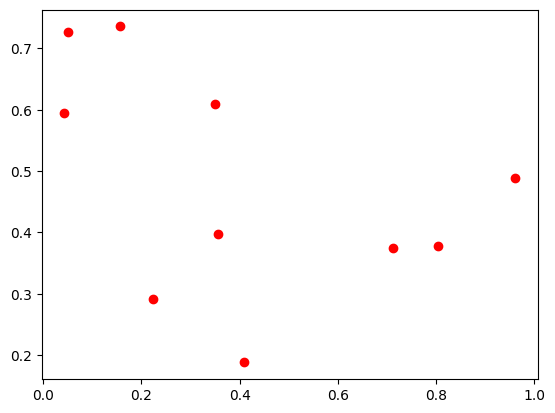

KeyboardInterrupt: 

In [4]:
fig, ax = plt.subplots()
ln, = ax.plot([], [], 'ro')

while True:
    xdata = np.random.rand(10)
    ydata = np.random.rand(10)
    ln.set_data(xdata, ydata)
    ax.relim()
    ax.autoscale_view()
    fig.canvas.draw()
    plt.pause(1)

### Explicitly spinning event loops

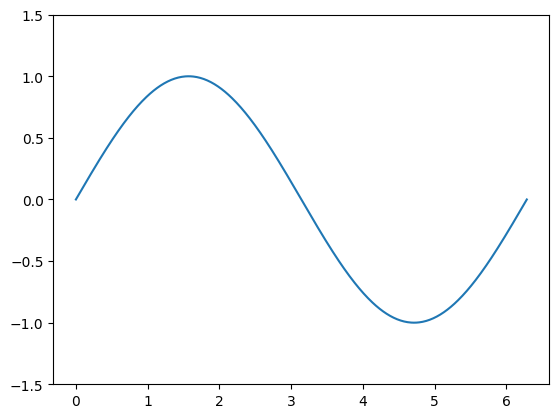

In [6]:
plt.ion()

fig, ax = plt.subplots()
th = np.linspace(0, 2*np.pi, 512)
ax.set_ylim(-1.5, 1.5)

ln, = ax.plot(th, np.sin(th))

def slow_loop(N, ln):
    for j in range(N):
        time.sleep(.1)  # to simulate some work
        ln.figure.canvas.flush_events()

slow_loop(100, ln)

In [7]:
def slow_loop(N, ln):
    for j in range(N):
        time.sleep(.1)  # to simulate some work
        if j % 10:
            ln.set_ydata(np.sin(((j // 10) % 5 * th)))
            ln.figure.canvas.draw_idle()

        ln.figure.canvas.flush_events()

slow_loop(100, ln)